# KNN 

### Data Set : IRIS 


#### Input features : [ 'SepalLengthCm', 'SepalWidthCm', 'petallengthcm', 'petalwidthcm' , ] , Pred :  'species'

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix 

In [2]:
data = pd.read_csv(r'C:\Users\mca\py_lab_064\ML_064\week9 KNN NB DT\KNN\iris1.csv')
data.head()

id  SepalLengthCm  SepalWidthCm  petallengthcm  petalwidthcm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
#checking for null values
data.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
petallengthcm    0
petalwidthcm     0
species          0
dtype: int64

In [4]:
#describing the data set mean q1 q2 q3 min max count frequency
data.describe()

id  SepalLengthCm  SepalWidthCm  petallengthcm  petalwidthcm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [7]:
data = data.drop('id', axis = 1)
data.head()

SepalLengthCm  SepalWidthCm  petallengthcm  petalwidthcm      species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [8]:
target_column = 'species'
feature_columns = [col for col in data.columns if col != target_column]

In [9]:
X = data[feature_columns]
y = data[target_column]

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
splits = [2,3,4] 
random_states = [0, 42]

In [12]:
result = []
for split_size in splits:
    split_size = split_size / 10
    for random_state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=random_state)
        
        knn = KNeighborsClassifier(n_neighbors=3)  
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred )
        con_mat = confusion_matrix(y_test , y_pred )
        result.append(["KNN","IRIS", split_size, random_state, accuracy])

result = pd.DataFrame(result, columns=["Model","Data_SET","train-test-split","Random_State","accuracy_score" ])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [13]:
result

Model Data_SET  train-test-split  Random_State  accuracy_score
0   KNN     IRIS               0.2             0        0.966667
1   KNN     IRIS               0.2            42        1.000000
2   KNN     IRIS               0.3             0        0.977778
3   KNN     IRIS               0.3            42        1.000000
4   KNN     IRIS               0.4             0        0.933333
5   KNN     IRIS               0.4            42        0.983333

In [91]:
result.to_excel("KNN_IRIS_064.xlsx")

 ### Besed On best Split and random state : 


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ac = accuracy_score(y_test, y_pred )
cv = confusion_matrix(y_test , y_pred )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
print("Accuracy : ",ac)

Accuracy :  1.0


<AxesSubplot:>

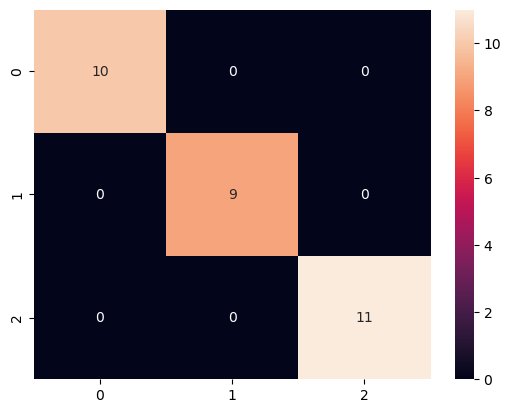

In [17]:
sns.heatmap(cv , annot = True)

In [19]:
testdata = {
    'SepalLengthCm' : [1],
    'SepalWidthCm' : [85],
    'petallengthcm' : [66],
    'petalwidthcm': [29],
}
df5 = pd.DataFrame(testdata)
y_pred = knn.predict(df5)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Iris-virginica'], dtype=object)